<a href="https://colab.research.google.com/github/sjmama/sem/blob/main/T%2CZ_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from scipy.stats import shapiro
from statsmodels.stats.weightstats import ztest as ztest
import scipy.stats
from scipy import stats
from scipy.stats import ttest_ind
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 100

In [9]:
df = pd.read_csv("Golf_test.csv")

# 데이터 샘플 확인
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   TypeA_before  50 non-null     int64
 1   TypeA_after   50 non-null     int64
 2   TypeB_before  50 non-null     int64
 3   TypeB_after   50 non-null     int64
 4   TypeC_before  50 non-null     int64
 5   TypeC_after   50 non-null     int64
dtypes: int64(6)
memory usage: 2.5 KB


In [10]:
df.describe()

,TypeA_before,TypeA_after,TypeB_before,TypeB_after,TypeC_before,TypeC_after
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,268.460000,270.720000,273.600000,276.100000,270.360000,271.040000
std,9.817124,8.487782,8.566665,8.493094,8.385507,9.437139
min,250.000000,255.000000,258.000000,261.000000,255.000000,253.000000
25%,262.000000,264.000000,266.250000,269.000000,263.250000,265.000000
50%,266.000000,271.000000,273.500000,276.500000,268.500000,268.000000
75%,275.750000,275.000000,278.000000,280.000000,275.750000,277.750000
max,289.000000,289.000000,292.000000,295.000000,289.000000,291.000000


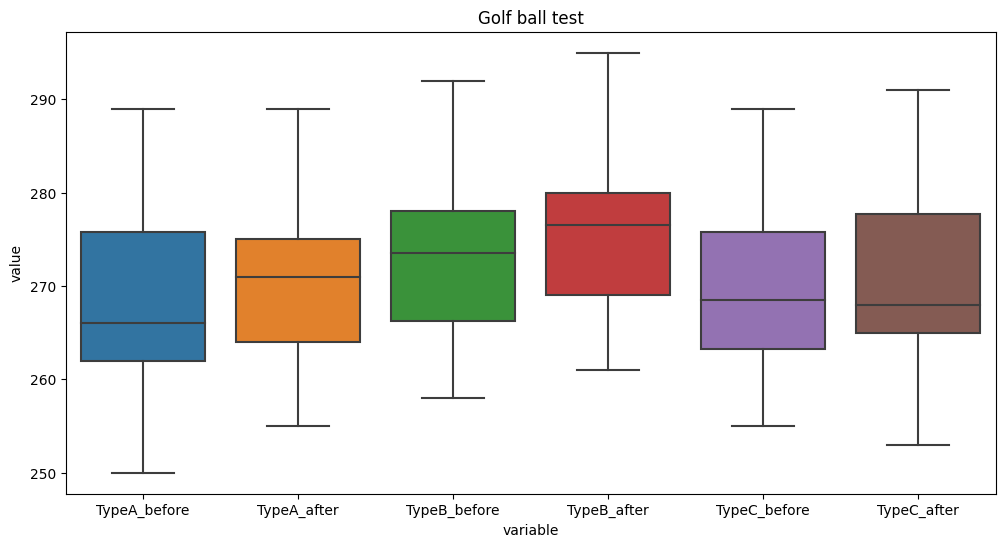

In [11]:
df2 =  pd.melt(df)
plt.figure(figsize=(12,6))
sns.boxplot(x='variable', y='value', data=df2)
plt.title('Golf ball test')
plt.show()

In [12]:
# 데이터 정규성 검정

print(shapiro(df['TypeA_before']))
print(shapiro(df['TypeA_after']))
print(shapiro(df['TypeB_before']))
print(shapiro(df['TypeB_after']))
print(shapiro(df['TypeC_before']))
print(shapiro(df['TypeC_after']))#p값이 0.05보다 높으면 귀무가설(정규성이 없음)을 기각한다

ShapiroResult(statistic=0.9655377864837646, pvalue=0.15155059099197388)
ShapiroResult(statistic=0.9728279113769531, pvalue=0.3005082309246063)
ShapiroResult(statistic=0.9730042219161987, pvalue=0.30535760521888733)
ShapiroResult(statistic=0.9693011045455933, pvalue=0.21675525605678558)
ShapiroResult(statistic=0.9595518112182617, pvalue=0.08513058722019196)
ShapiroResult(statistic=0.9469832181930542, pvalue=0.02568192593753338)


In [13]:
# 데이터 등분산성 검정
stats.bartlett(df['TypeA_before'],df['TypeA_after'],
               df['TypeB_before'],df['TypeB_after'],
               df['TypeC_before'],df['TypeC_after'])#p값이 0.05를 넘어서 등분산이라는 귀무가설을 채택한다

BartlettResult(statistic=2.232358764161634, pvalue=0.8161484218330712)

In [14]:
# Z-test (TypeA_Before와 TypeA_After)
ztest(df['TypeA_before'], x2=df['TypeA_after'], value=0, alternative='two-sided')

(-1.2313987682249838, 0.21817375744980994)

In [15]:
# Z-test (TypeA_Before와 TypeB_before)

# 양측검정
print(ztest(df['TypeA_before'], x2=df['TypeB_before'], value=0, alternative='two-sided'))

# 단측검정(왼꼬리검정)
print(ztest(df['TypeA_before'], x2=df['TypeB_before'], value=0, alternative='smaller'))

# 단측검정(오른꼬리검정)
print(ztest(df['TypeA_before'], x2=df['TypeB_before'], value=0, alternative='larger'))#0.05보다 작으면 유의미한 차이가 있다.

(-2.789495974658115, 0.005279015267745852)
(-2.789495974658115, 0.002639507633872926)
(-2.789495974658115, 0.9973604923661271)


In [16]:
# 대응표본 t검정 수행
scipy.stats.ttest_rel(df['TypeA_before'],df['TypeA_after'])

TtestResult(statistic=-1.221439914972903, pvalue=0.22776376448687602, df=49)

In [17]:
# 독립표본 t검정 수행
ttest_ind(df['TypeA_before'],df['TypeB_before'], equal_var=False)

Ttest_indResult(statistic=-2.789495974658115, pvalue=0.0063642243501398285)